In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the training set
df_train  = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = df_train.iloc[:,1:2].values # just getting the open stock price column

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) # scaling stock price between 0 and 1
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# creating a datastructure with 60 timesteps and 1 output
X_train = [] # contains data of 60 timesteps before time t including t
y_train = [] # contains data of output stock price at time t+1
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
# converting the X_train and y_train lists into numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [5]:
# importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
# initialize the RNN
regressor = Sequential() # we are predicting a continous value hence the name regressor

#### Adding LSTM layers with dropout regularization

In [7]:
# first LSTM layer with dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [8]:
# second LSTM layer with dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
# third LSTM layer with dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# fourth LSTM layer with dropout regularization
# return_sequences = false since it is the last lstm layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [11]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [12]:
# compiling the rnn
# RMSprop is good choice for rnn
# mean_squared_error since we are doing regression
regressor.compile(optimizer = 'adam',loss= 'mean_squared_error')

In [13]:
# fitting the RNN to the training set
regressor.fit(X_train,y_train,epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 92ms/step - loss: 0.0444
Epoch 2/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 3s 89ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0045
Epoch 9/100
38/38 [==============================] - 3s 87ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 3s 88ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 3s 86ms/step - loss: 0.0039
Epoch 13/100
38/38 [====

In [14]:
# loading the real stock price in month of january 2017
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = df_test.iloc[:,1:2].values

In [15]:
# predicted stock price for january 2017
dataset_total = pd.concat((df_train["Open"],df_test["Open"]),axis = 0)
# input data is the stock prices from 60 days before jan 2017 to last day-1 of jan 2017
inputs = dataset_total[len(dataset_total)-len(df_test)-60:].values
# reshaping them 
inputs = inputs.reshape(-1,1)
# we need to scale the inputs
inputs = sc.transform(inputs)

In [16]:
# creating the 3-D structure for RNN
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [17]:
# predicting the stock prices
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

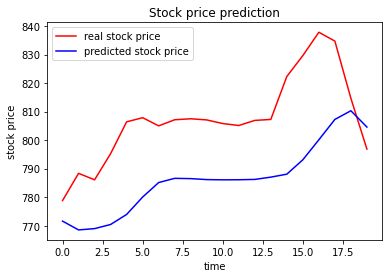

In [23]:
# visualizing the results 
plt.plot(real_stock_price,color = 'red',label = "real stock price")
plt.plot(predicted_stock_price,color = 'blue',label = "predicted stock price")
plt.title('Stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()